<a href="https://colab.research.google.com/github/laurenziu10/data_exploration/blob/main/disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laurenziu10/data/main/Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
# Überblick über den Datensatz
print("Übersicht der Daten:")
print(df.info())

# Fehlende Werte
print("\nFehlende Werte pro Spalte:")
print(df.isnull().sum())

# Statistische Zusammenfassung
print("\nStatistische Zusammenfassung:")
print(df.describe())

Übersicht der Daten:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB
None

Fehlende Werte pro Spalte:
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pr

In [5]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

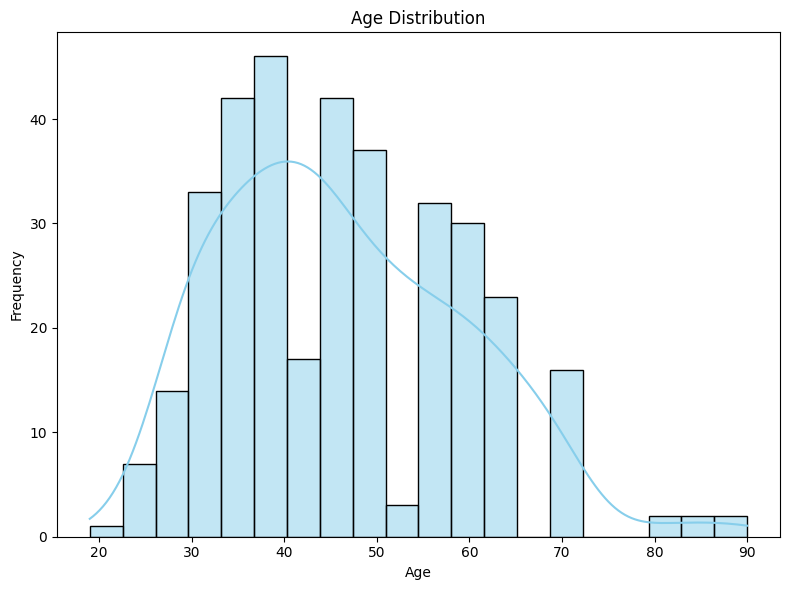

In [6]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

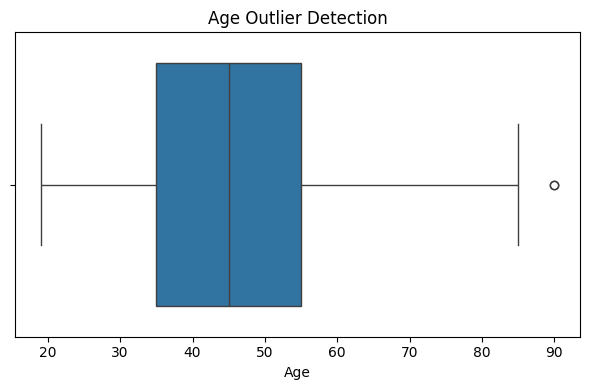

In [7]:
# Boxplot for outlier detection in Age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Age', data=df)
plt.title('Age Outlier Detection')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

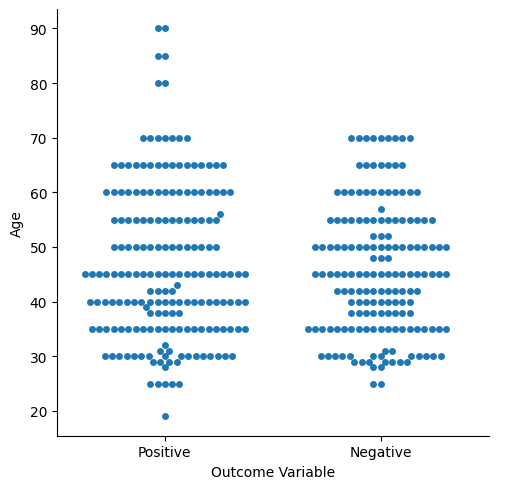

In [17]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df, kind ='swarm')

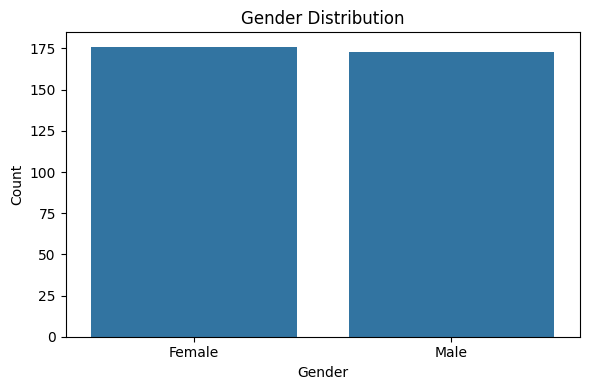

In [8]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

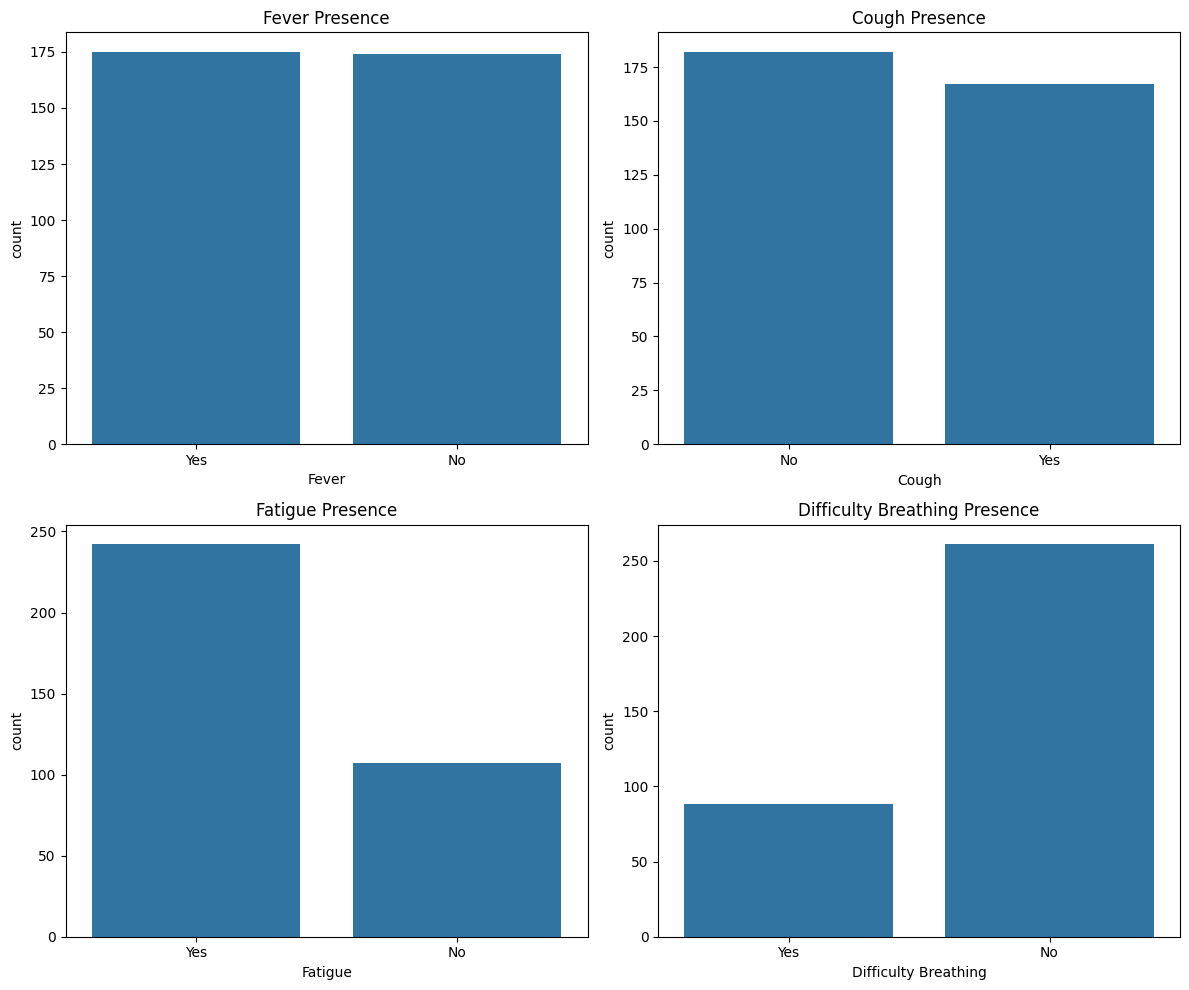

In [9]:
# Symptom presence visualization
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for sym, ax in zip(symptoms, axes.flatten()):
    sns.countplot(x=sym, data=df, ax=ax)
    ax.set_title(f'{sym} Presence')

plt.tight_layout()
plt.show()

<Axes: >

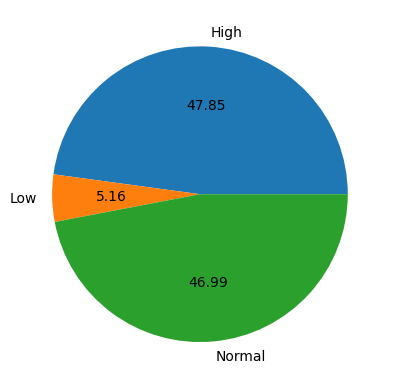

In [18]:
df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

<Axes: >

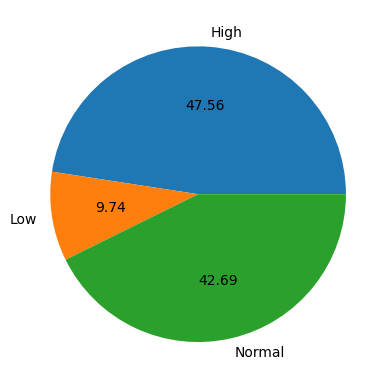

In [19]:
df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

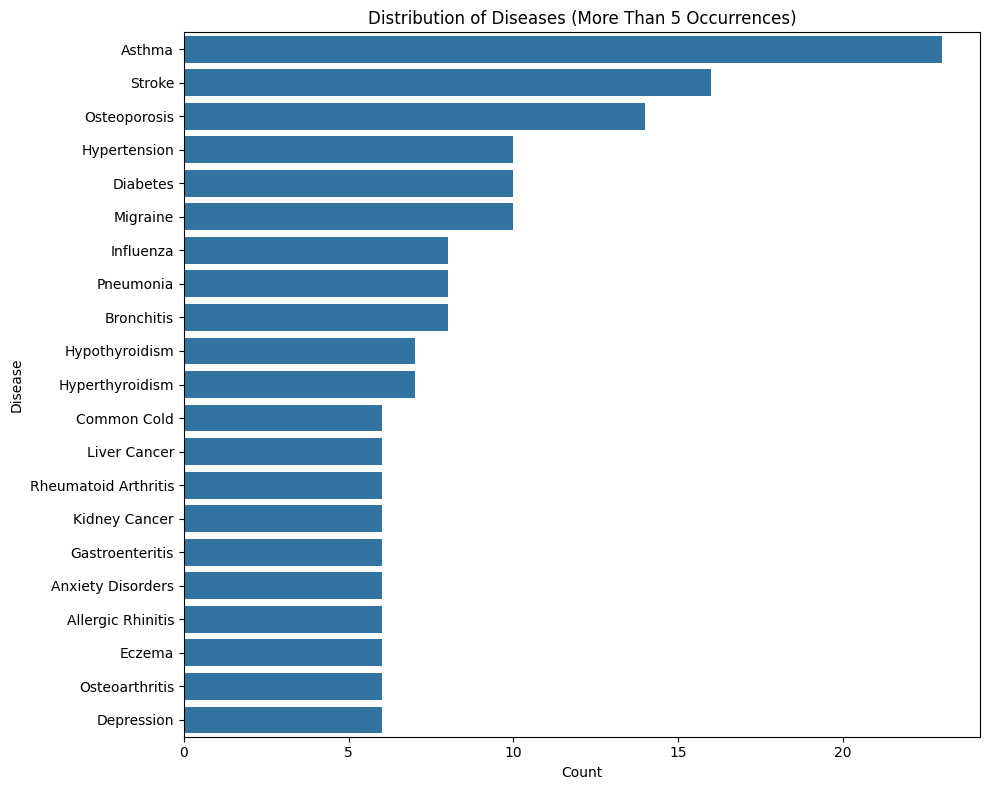

In [10]:
# Filter diseases that occur more than 5 times
disease_counts = df['Disease'].value_counts()
diseases_more_than_5 = disease_counts[disease_counts > 5].index

filtered_data = df[df['Disease'].isin(diseases_more_than_5)]

# Visualization of the distribution of diseases (only those occurring more than 5 times)
plt.figure(figsize=(10, 8))
sns.countplot(y='Disease', data=filtered_data, order = filtered_data['Disease'].value_counts().index)
plt.title('Distribution of Diseases (More Than 5 Occurrences)')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

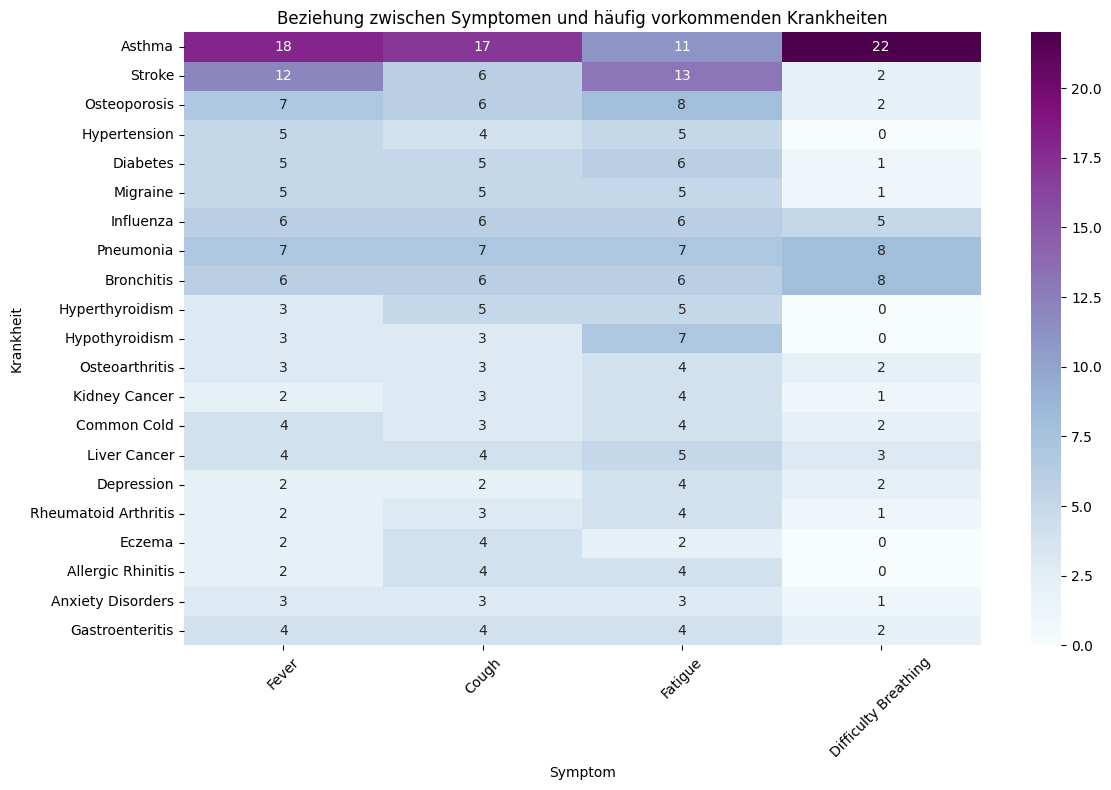

In [11]:
# Umwandlung der Symptomwerte von 'Ja'/'Nein' in numerische Werte (1/0)
symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
df[symptom_columns] = df[symptom_columns].apply(lambda x: x.map({'No': 0, 'Yes': 1}))

# Ermittlung der Krankheiten, die häufiger als 5 Mal vorkommen
disease_counts = df['Disease'].value_counts()
diseases_more_than_5 = disease_counts[disease_counts > 5].index

# Analyse der Beziehung zwischen Symptomen und Krankheiten
symptoms_per_disease = df.groupby('Disease')[symptom_columns].sum()

# Filtern für häufig vorkommende Krankheiten
symptoms_per_disease_filtered = symptoms_per_disease.loc[diseases_more_than_5]

# Visualisierung der Beziehung zwischen Symptomen und häufig vorkommenden Krankheiten
plt.figure(figsize=(12, 8))
sns.heatmap(symptoms_per_disease_filtered, annot=True, cmap="BuPu", fmt="d")
plt.title('Beziehung zwischen Symptomen und häufig vorkommenden Krankheiten')
plt.ylabel('Krankheit')
plt.xlabel('Symptom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

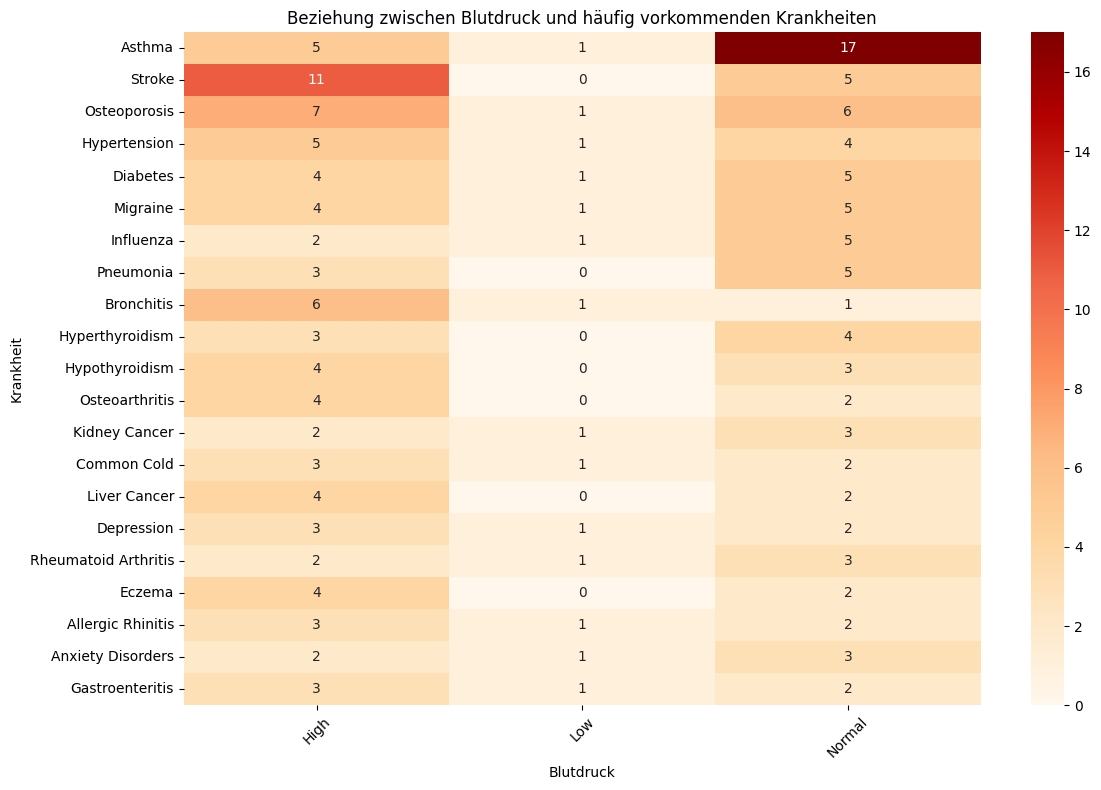

In [12]:
# Analyse der Beziehung zwischen Blutdruck/Cholesterinspiegel und Krankheiten
blood_pressure_disease_relation = df.groupby('Disease')['Blood Pressure'].value_counts().unstack(fill_value=0)
cholesterol_disease_relation = df.groupby('Disease')['Cholesterol Level'].value_counts().unstack(fill_value=0)

# Visualisierung der Beziehung zwischen Blutdruck und Krankheiten
plt.figure(figsize=(12, 8))
sns.heatmap(blood_pressure_disease_relation.loc[diseases_more_than_5], annot=True, cmap="OrRd", fmt="d")
plt.title('Beziehung zwischen Blutdruck und häufig vorkommenden Krankheiten')
plt.ylabel('Krankheit')
plt.xlabel('Blutdruck')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

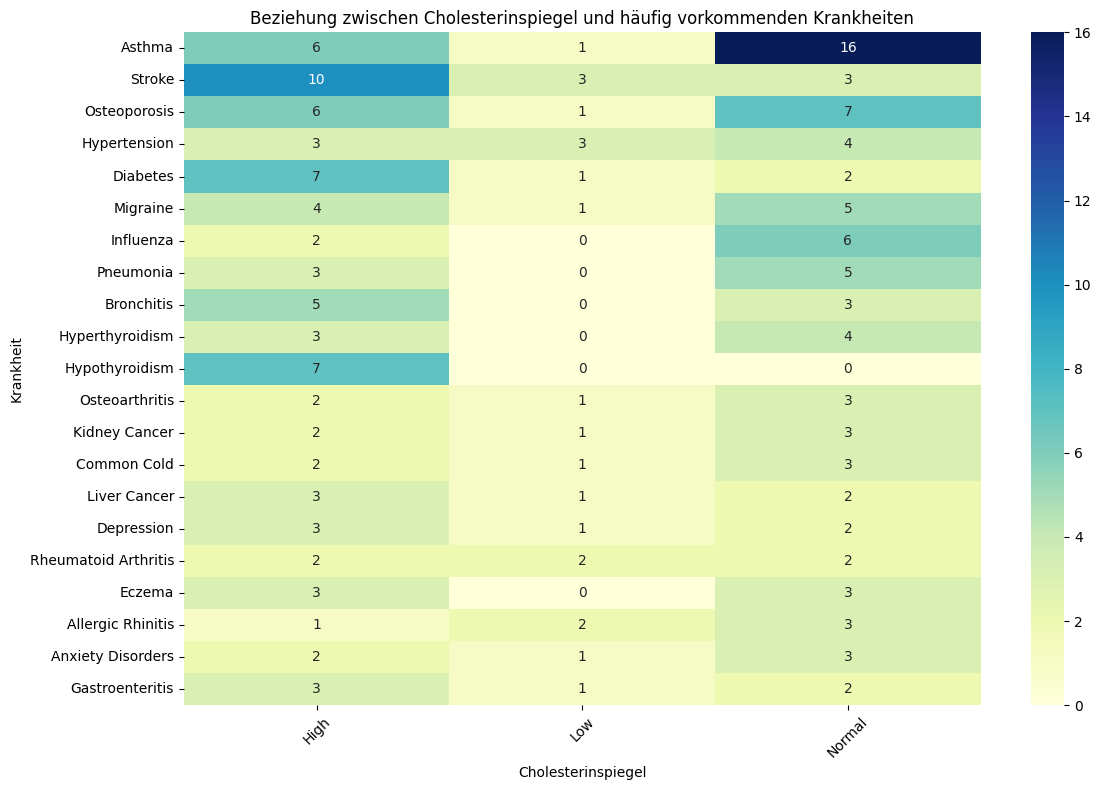

In [13]:
# Visualisierung der Beziehung zwischen Cholesterinspiegel und Krankheiten
plt.figure(figsize=(12, 8))
sns.heatmap(cholesterol_disease_relation.loc[diseases_more_than_5], annot=True, cmap="YlGnBu", fmt="d")
plt.title('Beziehung zwischen Cholesterinspiegel und häufig vorkommenden Krankheiten')
plt.ylabel('Krankheit')
plt.xlabel('Cholesterinspiegel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()